In [1]:
from PymoNNto import *

In [2]:
import matplotlib.pyplot as plt
def plot_ut(data,th):
    plt.plot(data,color='black')
    plt.axhline(th,color='gray',linestyle='dotted')
    plt.show()

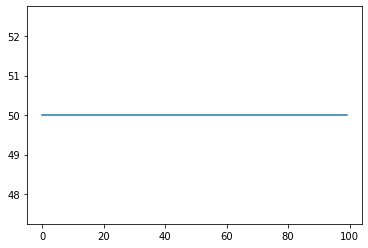

In [3]:
def constant(a,t=None):
    return a

plt.plot([constant(50,t) for t in range(100)])

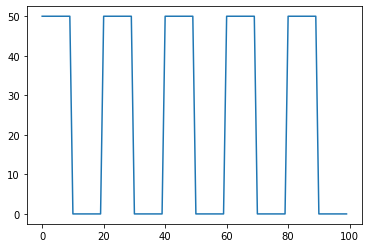

In [4]:
def func(a,b,t):
    if t//b%2 == 0:
        return a
    return 0

plt.plot([func(50,10,t) for t in range(100)])

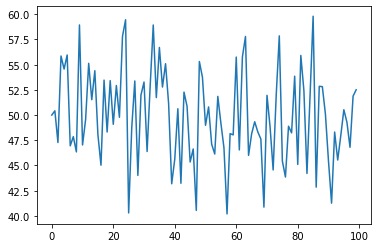

In [5]:
import random
from math import sin
def noisy_constant(a,t):
    b = random.randint(2, 10)
    return constant(a) + b*sin(b*t)

plt.plot([noisy_constant(50,t) for t in range(100)])

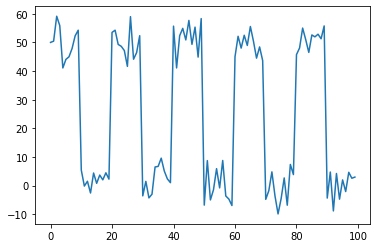

In [6]:
def noisy_func(a,c,t):
    b = random.randint(2, 10)
    return func(a,c,t) + b*sin(b*t)

plt.plot([noisy_func(50,10,t) for t in range(100)])

In [7]:
def measure_F(network):
    count = 0
    t = 0
    tf = []
    while count<2 and t<len(network['n.fired', 0, 'np']):
        if network['n.fired', 0, 'np'][t] == True:
            tf.append(t)
            count += 1
        t +=1
    if len(tf) == 2:
        return 1/(tf[1]-tf[0])
    return 0

# LIF

In [8]:
class LIF(Behaviour):
    
    def set_variables(self, n):
        self.set_init_attrs_as_variables(n)
        self.threshold = n.threshold
        n.voltage = n.get_neuron_vec('uniform')*n.voltage_rest
        n.fired = n.get_neuron_vec() > 0
        n.dt = 0.1
         
    def new_iteration(self, n):
        n.voltage += ((n.voltage_rest-n.voltage)+n.I)*(n.dt/n.tau)
        n.fired = n.voltage > n.threshold
        if np.sum(n.fired) > 0:
            n.voltage[n.fired] = n.voltage_reset

class LIF_input(Behaviour):
    
    def set_variables(self, n):
        n.I = n.get_neuron_vec()
    def new_iteration(self, n):
        n.I = current(n.iteration)

In [9]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.242ms


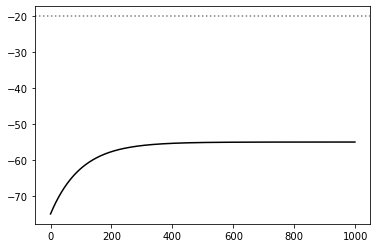

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.218ms


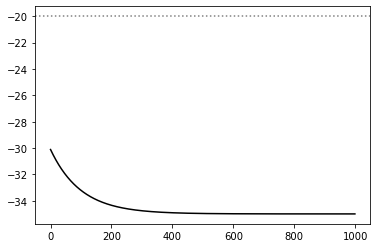

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 29.946ms


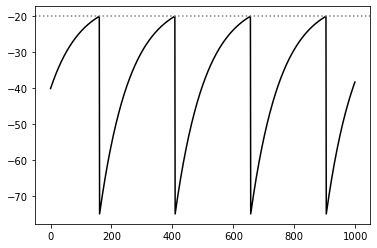

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 23.627ms


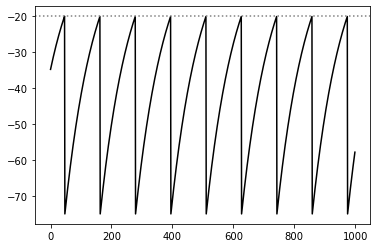

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.232ms


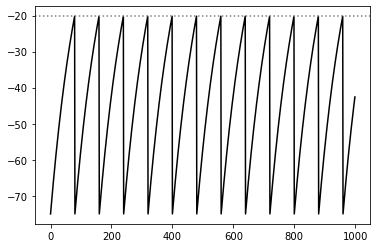

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 22.139ms


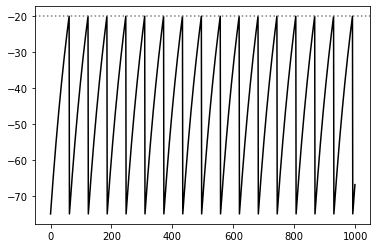

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 38.328ms


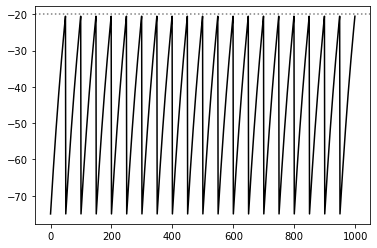

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 35.048ms


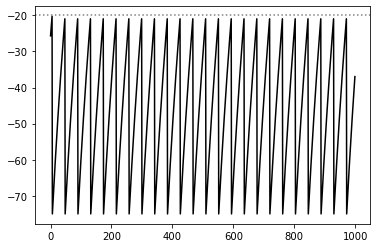

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 37.366ms


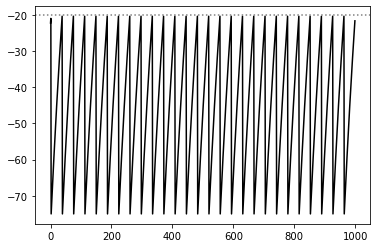

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 34.187ms


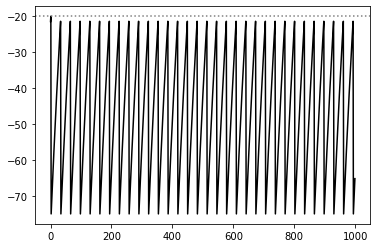

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 32.878ms


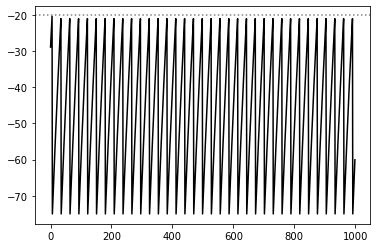

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 42.879ms


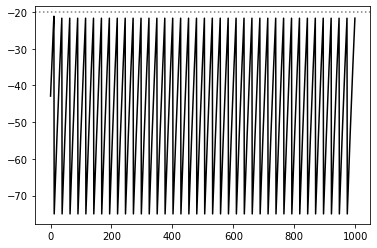

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 36.932ms


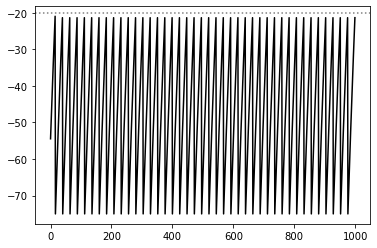

In [10]:
F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

با اقزایش عدد جریان وارد شده ، اختلاف پتانسیل ایجاد شده به آستانه می‌رسد و باعث اسپایک نورون یا همان فایر شدن آن می‌شود.  بعد از این هرچه جریان را بیشتر کنیم سرعت رسیدن به آستانه بیشتر شده و در نتیجه تعداد اسپایک ها در این بازه ی زمانی بیشتر می‌شوند. که تاثیر این کوتاه شدن زمان بین دو اسپایک را می‌توان روی نودار زیر به صورت افزایش فرکانس مشاهده کرد.

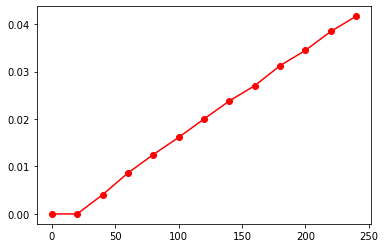

In [11]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

# ELIF

In [12]:
class ELIF(Behaviour):
    
    def set_variables(self, n):
        self.set_init_attrs_as_variables(n)
        self.threshold = n.threshold
        n.voltage = n.get_neuron_vec('uniform')*n.voltage_rest
        n.fired = n.get_neuron_vec() > 0
        n.dt = 0.1

    def new_iteration(self, n):
        n.voltage += ((n.voltage_rest-n.voltage)+n.I+n.delta*exp(
            (n.voltage-n.tetha_rh)/n.delta))*(n.dt/n.tau)
        n.fired = n.voltage > n.threshold
        if np.sum(n.fired) > 0:
            n.voltage[n.fired] = n.voltage_reset

class ELIF_input(Behaviour):
    
    def set_variables(self, n):
        n.I = n.get_neuron_vec()

    def new_iteration(self, n):
        n.I = current(n.iteration)

In [13]:
def present_ELIF_neuron_activity():
    single_neuron_network2 = Network()

    neuron2 = NeuronGroup(net=single_neuron_network2, tag='ELIF_neuron', size=1, behaviour={
        1: ELIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=1, tetha_rh=-30),
        2: ELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network2.initialize()
    single_neuron_network2.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network2['n.voltage', 0],single_neuron_network2['ELIF', 0].threshold)
    return single_neuron_network2

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 31.273ms


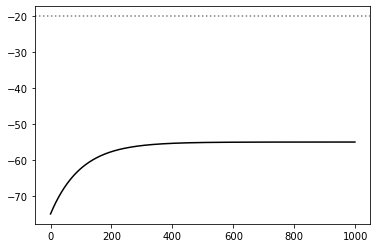

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.886ms


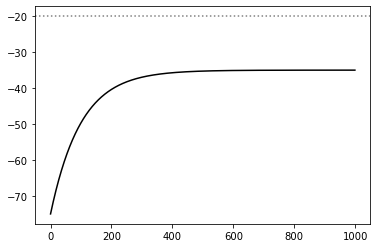

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 33.942ms


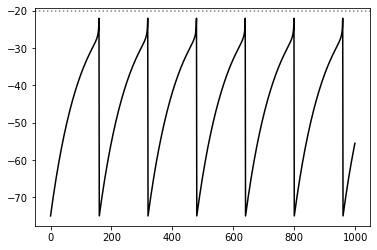

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 46.874ms


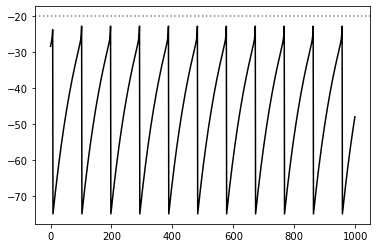

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 38.096ms


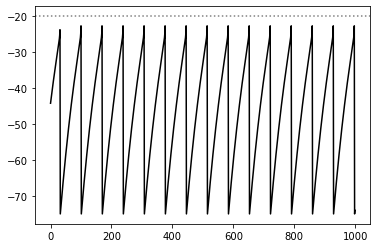

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 57.847ms


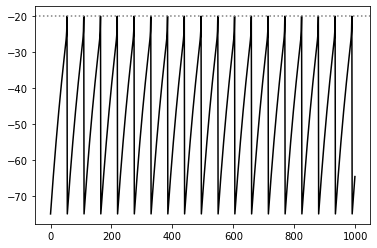

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.877ms


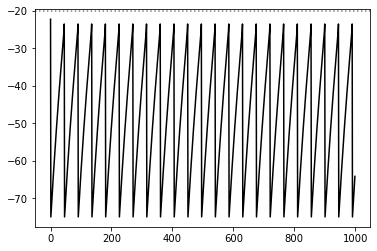

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 50.896ms


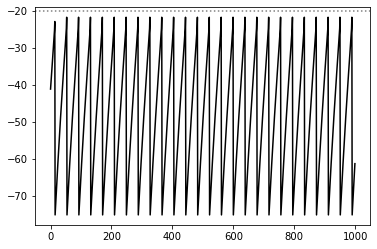

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 28.971ms


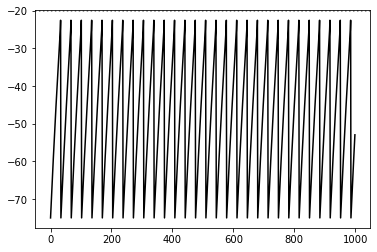

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 36.945ms


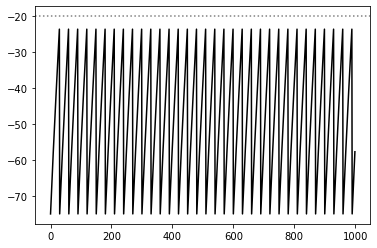

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 40.634ms


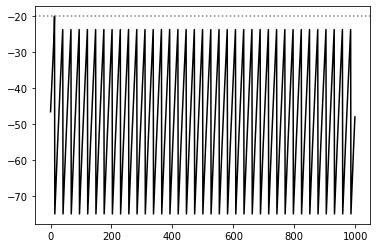

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 51.563ms


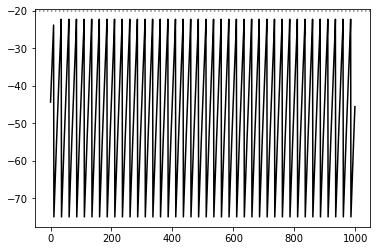

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.852ms


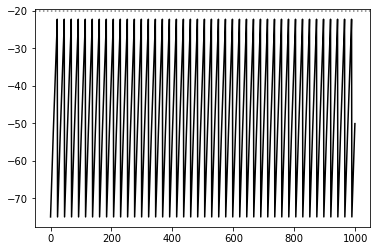

In [14]:
F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_ELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

روی این مدل هم مثل قبلی تاثیر اقزایش جریان ورودی بر تعداد اسپایک ها و اختلاف زمان بین دو اسپایک متوالی را داریم. تفاوت این مدل و مدل قبلی را روی نمودار ها در شکل انحنای نمودار می‌توان دید که در این بخش به وضوح حالت نمایی قابل مشاهده ست.

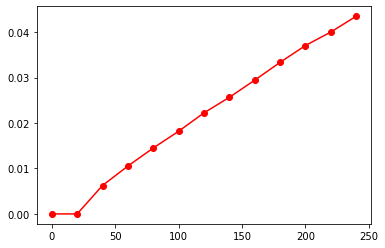

In [15]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

# AELIF

In [16]:
class AELIF(Behaviour):
    
    def set_variables(self, n):
        self.set_init_attrs_as_variables(n)
        self.threshold = n.threshold
        n.voltage = n.get_neuron_vec('uniform')*n.voltage_rest
        n.fired = n.get_neuron_vec() > 0
        n.dt = 0.1
        self.total_spike = 0

    def new_iteration(self, n):
        n.w += (n.a*(n.voltage-n.voltage_rest)-n.w+n.b*n.tau_w*self.total_spike)*(n.dt/n.tau_w)
        n.voltage += ((n.voltage_rest-n.voltage)+n.I-n.w+n.delta*exp(
            (n.voltage-n.tetha_rh)/n.delta))*(n.dt/n.tau)
        n.fired = n.voltage > n.threshold
        if np.sum(n.fired) > 0:
            n.voltage[n.fired] = n.voltage_reset
            self.total_spike += 1
            

class AELIF_input(Behaviour):
    
    def set_variables(self, n):
        n.I = n.get_neuron_vec()

    def new_iteration(self, n):
        n.I = current(n.iteration)

In [17]:
def present_AELIF_neuron_activity():
    single_neuron_network3 = Network()

    neuron3 = NeuronGroup(net=single_neuron_network3, tag='AELIF_neuron', size=1, behaviour={
        1: AELIF(voltage_rest=-55, voltage_reset=-75,
             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=1, b=1, w=0),
        2: AELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network3.initialize()
    single_neuron_network3.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network3['n.voltage', 0],single_neuron_network3['AELIF', 0].threshold)
    return single_neuron_network3

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 48.837ms


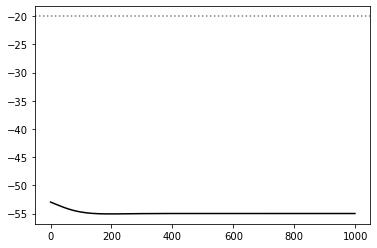

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 62.496ms


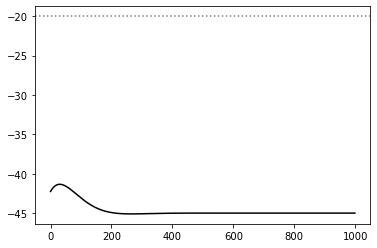

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 43.205ms


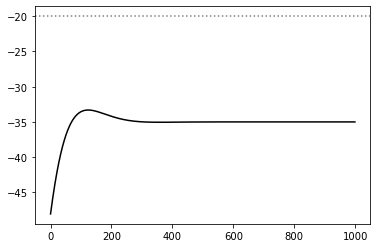

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 42.494ms


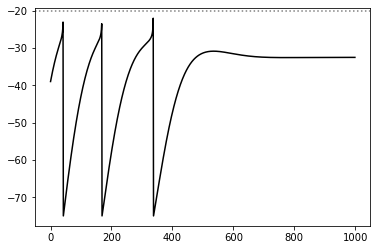

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 56.837ms


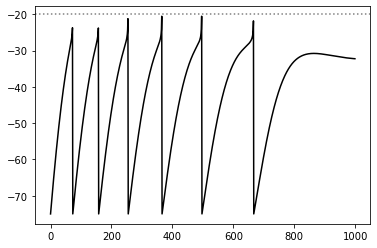

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 51.862ms


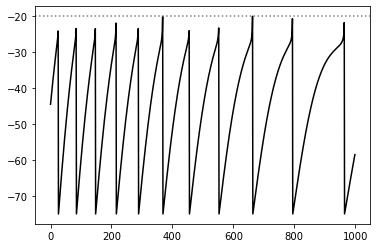

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.865ms


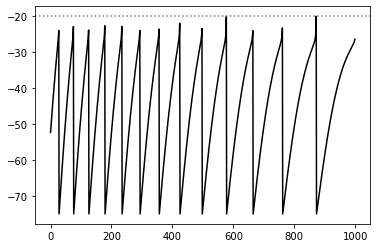

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 45.718ms


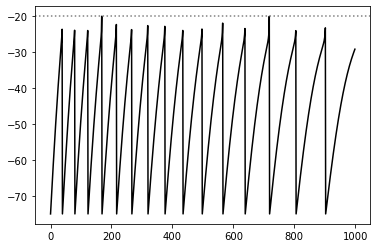

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 43.680ms


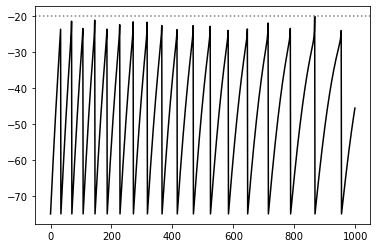

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 90.972ms


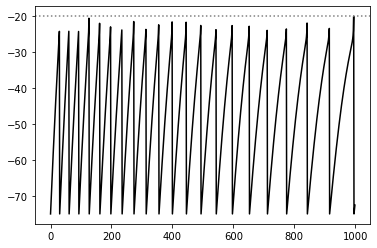

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.877ms


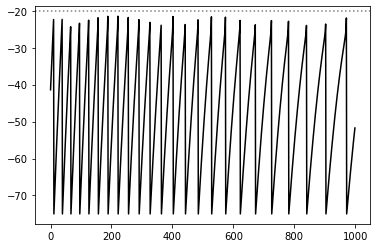

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 52.890ms


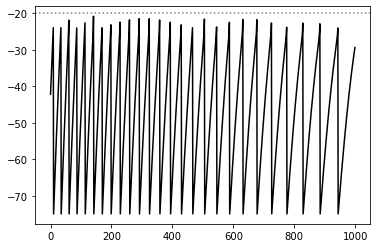

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 47.613ms


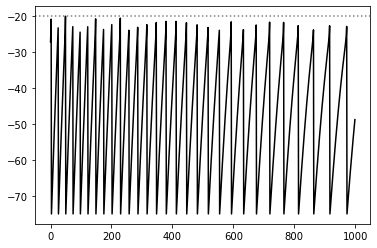

In [18]:
F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_AELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

تاثیر افزایش جریان بر مدل همان قبلی بود که گفته شد. آنچه منحصرا اینجا دیده می‌شود تاثیر زمان بر فرکانش اسپایک هاست. اگر بین تراکم ضربات در ابتدای نمودار و انتهای ان دقت کنیم این تراکم رو به کاهش است. و این تاقیر همان فاکتور انطباق بر مدل است.

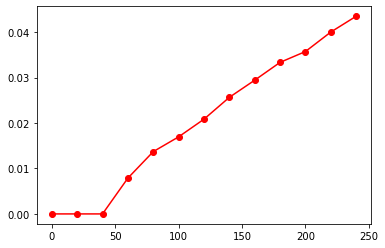

In [19]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

در این مدل چون فرکانس ضربه ها ثابت نیست و به مرور زمان به علت ماهیت و کارکرد انطباق پذیر مدل کاهش می‌یابد برای نمودار فرکانس-جریان از بیشترین فرکانس بدست آمده یعنی عکس فاصله ی بین دو ضریه ی اول متوالی استفاده کردم.

# Neural activity for some noisy constant input current

مقداری نویز به یکی از جریان هایی که در ثبل به هر مدل وارد شد واضافه می‌کنم و آن جریان را به مدل های محتلف وارد کردم تا تاثیر را ببینم. این نویز از طریق تابعی که اوایل این فایل تغریف شده وارد می‌شود و نتیجه این است که هر سه مدل نسبت به جریان نویزی مقاومت و تشخیص دارند. این اندازه از نویز روی کارکرد مدل ها بی تاثیر بوده. هرچند لرزشی که روی نمودار سوم هست شاید نشان دهنده ی این باشد که مدل انظباقی نسبت به دو مدل دیگر به نویز حساس تر است.

## LIF

init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 46.887ms


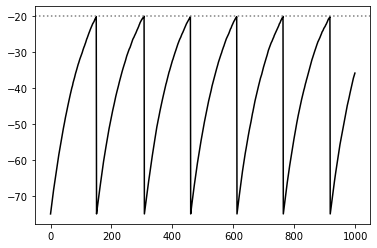

In [20]:
def current(t):
    return noisy_constant(50,t)
    
present_LIF_neuron_activity()

## ELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.906ms


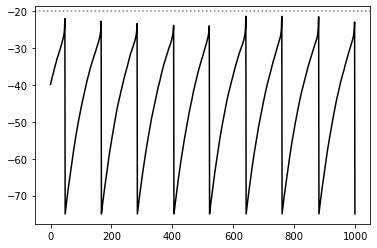

In [21]:
def current(t):
    return noisy_constant(50,t)
    
present_ELIF_neuron_activity()

## AELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 54.868ms


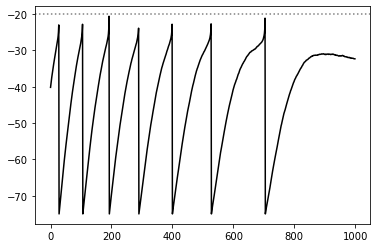

In [22]:
def current(t):
    return noisy_constant(80,t)
    
present_AELIF_neuron_activity()

# Neural activity for some arbitrary input current

یک تابع متناوب که اول فایل تعریف شد را به عنوان جریان ورودی به نورون ها می‌دهم. هر سه مدل رفتاری که نشان می‌دهند طبیعت تناوب تابع جریان را منعکس می‌کند. در مدل اول شدت جریان در حدی نیت که تا 1000 ایتریشن اول به استانه برسد ولی افزایش های ریز و جزیی بیشتری مقدار اختلاف پتانسیل قابل ملاخظه ست. با شدت جریان پایه ی بیشتری همین مدل را استفاده میکنم. در شکل دوم اسپایک ها مشخص است. در هر دو مدل بعدی هم همین وضعیت به استانه رسیدن و اسپایک مشخص است تنها تفاوت این با تابع جریان ثابت این که در نمودار اختلاف پتانسیل ها در لحظات صفر شدن جریان ورودی حالت های افتادگی لحظه ای مثل اینکه به نمودار نویز متناوب و منظم وارد شده باشد مشخص است.

## LIF

init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 38.915ms


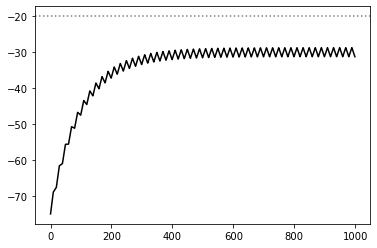

In [23]:
def current(t):
    return func(50,10,t)
    
present_LIF_neuron_activity()

init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 48.900ms


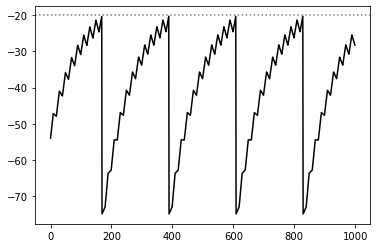

In [24]:
def current(t):
    return func(80,10,t)
    
present_LIF_neuron_activity()

## ELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 46.202ms


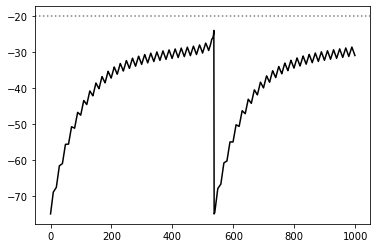

In [25]:
def current(t):
    return func(50,10,t)
    
present_ELIF_neuron_activity()

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 70.798ms


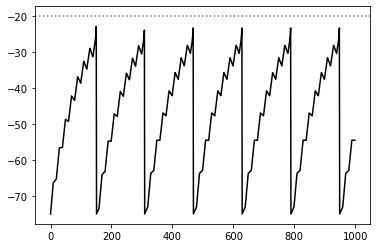

In [26]:
def current(t):
    return func(80,10,t)
    
present_ELIF_neuron_activity()

## AELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 58.842ms


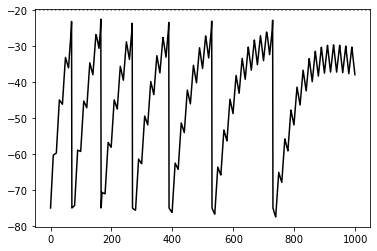

In [27]:
def current(t):
    return func(150,10,t)
    
present_AELIF_neuron_activity()

# Neural activity for some noisy arbitrary input current

همان تابع بخش قبلی به علاوه ی نویز به عنوان جریان ورودی به نورون های سه مدل داده شده. تاثیر این نویز را روی لرزش نمودار ها می‌توان دید. مخصوصا در مدل اول لرزش نوسان ها نسبت به حالت بدون نویز مشخص است ولی در بقیه موارد و شدت اسپایک ها و ... تغیری ایجاد نشده. می‌توان گفت این اندازه از نویز جریان ورودی روی کارکرد مدل تحمل می‌شود.

## LIF

init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 42.898ms


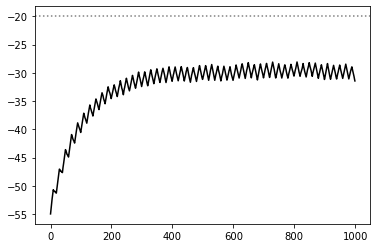

In [28]:
def current(t):
    return noisy_func(50,10,t)
    
present_LIF_neuron_activity()

## ELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 54.291ms


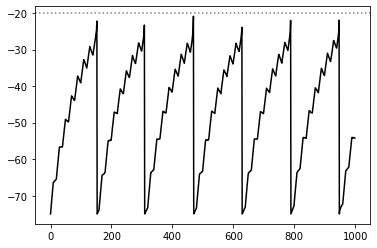

In [29]:
def current(t):
    return noisy_func(80,10,t)
    
present_ELIF_neuron_activity()

## AELIF

init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 59.840ms


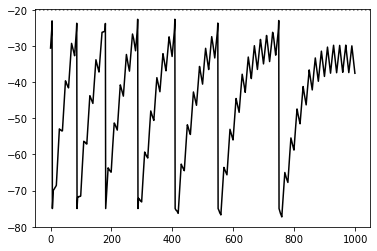

In [30]:
def current(t):
    return noisy_func(150,10,t)
    
present_AELIF_neuron_activity()

# other 4 sets of parameters

چهار مجموعه پارامتر دیگر ایجاد و همان مدل هایی که در بحش اول ساختم را با پارامترهای جدید ایجاد می‌کنم و تاقیر همان جریان هایی که در بخش اول وارد شد را بر مدل های جدید می‌سنجم تا تاثیر هر یک از پارامتر ها را در کارکرد مدل ببینم.

# LIF

In [31]:
## voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10 
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100
# voltage_rest=-55, voltage_reset=-95, threshold=-20, tau=100
# voltage_rest=-70, voltage_reset=-75, threshold=-20, tau=100
# voltage_rest=-55, voltage_reset=-75, threshold=-50, tau=100

In [32]:
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 20.033ms


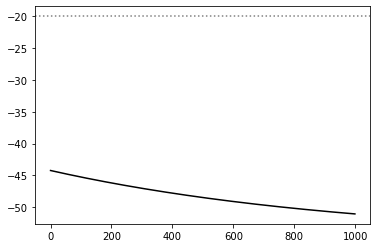

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.940ms


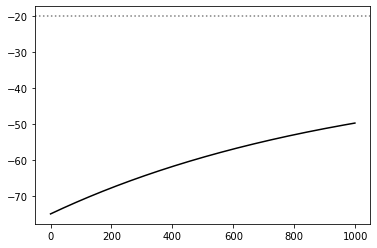

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 34.904ms


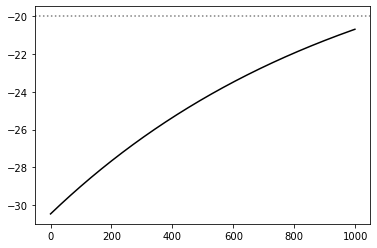

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 29.918ms


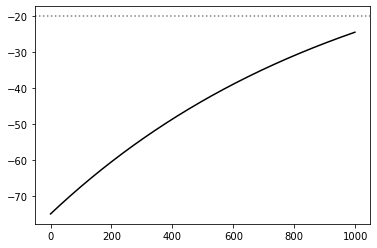

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 37.201ms


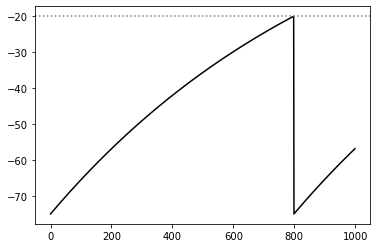

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 32.926ms


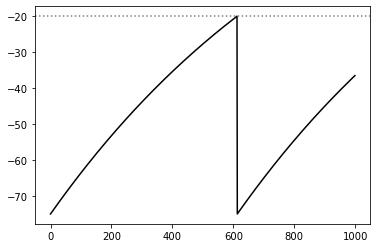

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.906ms


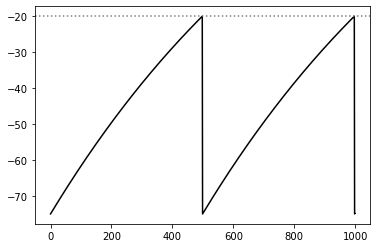

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 39.891ms


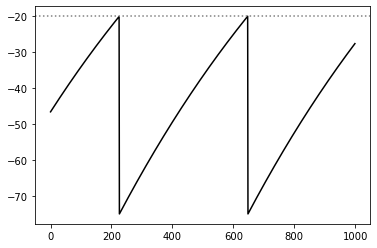

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 21.295ms


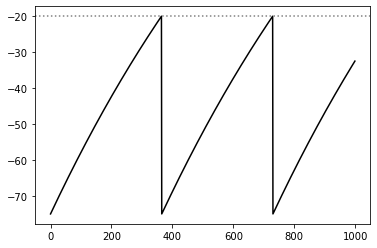

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 34.914ms


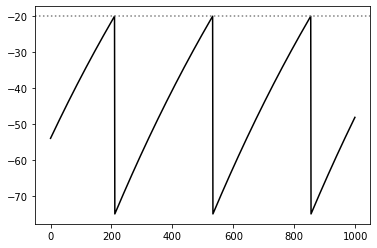

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.867ms


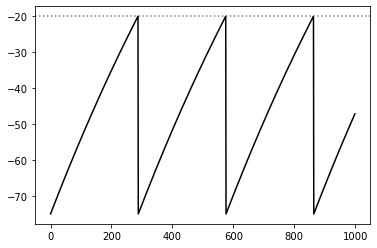

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 43.014ms


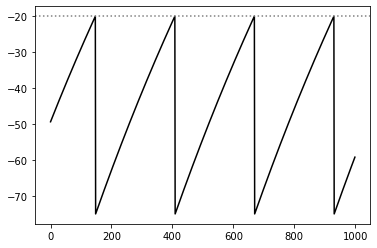

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 36.892ms


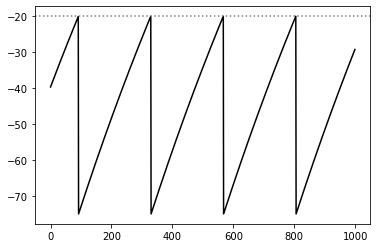

In [33]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

متغیر تاو را زیاد کردم. روی نمودار دوره های تناوب فایرها بیشتر شده. تاو هرچه بیشتر باشد مقاومت مدل به تغیرات پتانسیل را بیشتر می‌کند.

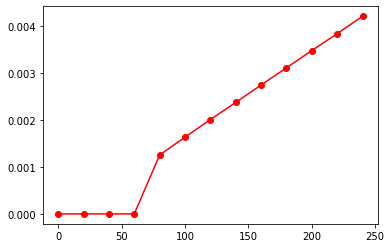

In [34]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [35]:
# voltage_rest=-55, voltage_reset=-95, threshold=-20, tau=10

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 27.697ms


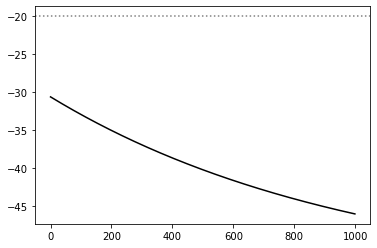

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 29.908ms


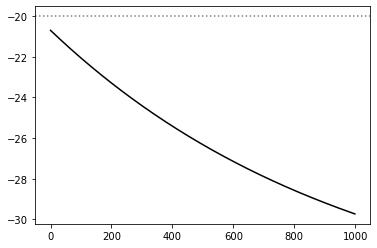

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 29.934ms


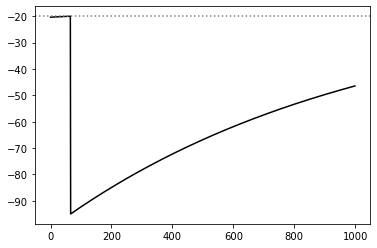

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 36.358ms


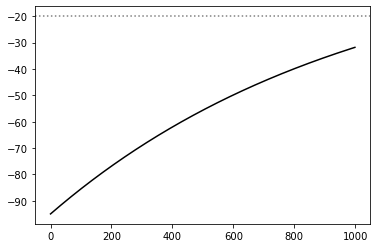

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 36.900ms


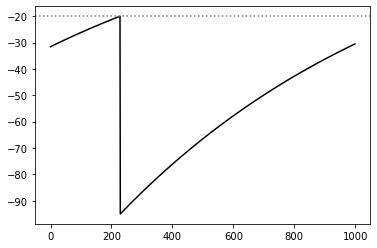

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 40.915ms


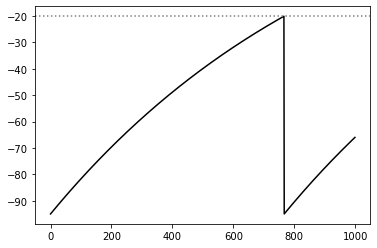

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 35.856ms


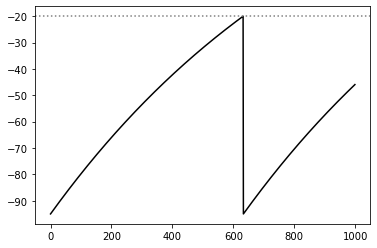

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.907ms


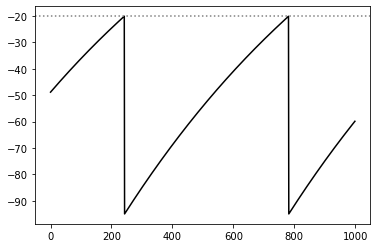

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.876ms


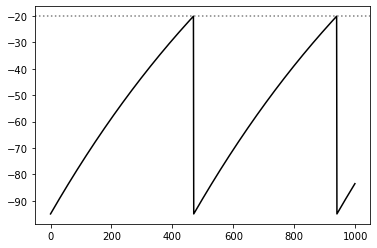

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 37.911ms


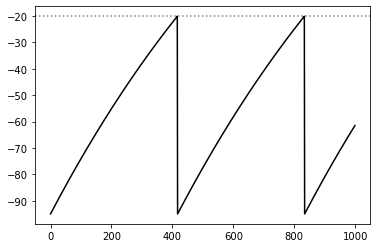

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.242ms


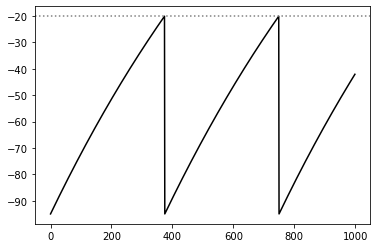

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.243ms


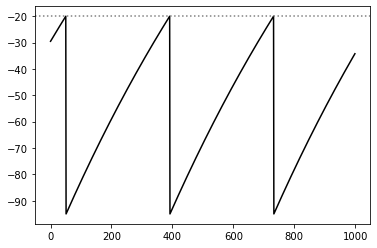

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.207ms


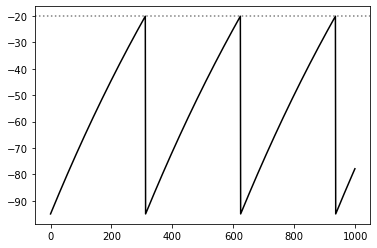

In [36]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-55, voltage_reset=-95, threshold=-20, tau=100),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network

F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

ولتاژ ریست را کمتر کردم. این تغیر برد تغیرات اختلاف پتانسیل را زیادتر می‌کند ولی روی دامنه فایرها و شیب منحنی ها و ... بی تاثیر است.

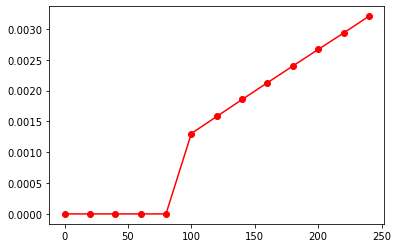

In [37]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [38]:
# voltage_rest=-70, voltage_reset=-75, threshold=-20, tau=100

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.934ms


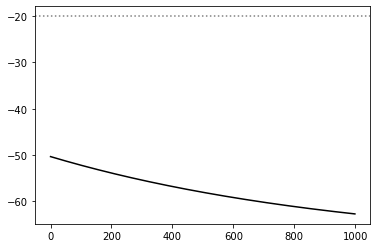

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.946ms


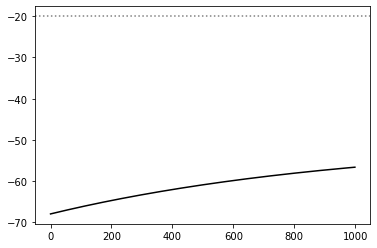

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 30.916ms


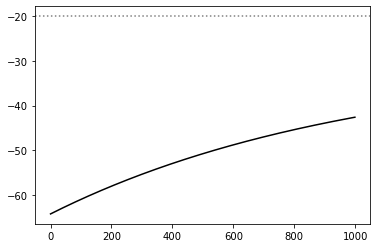

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.242ms


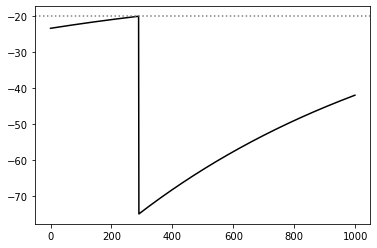

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 41.888ms


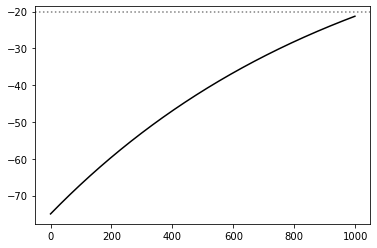

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 26.411ms


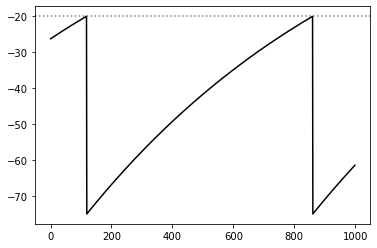

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 34.759ms


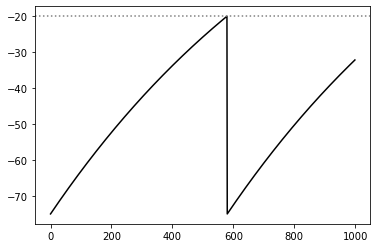

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.253ms


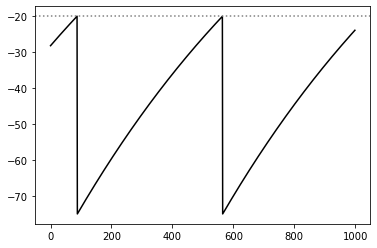

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.247ms


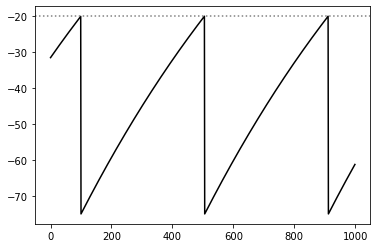

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.923ms


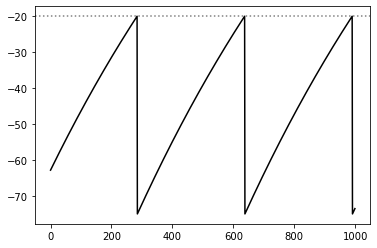

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.241ms


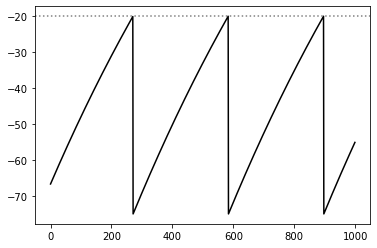

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.250ms


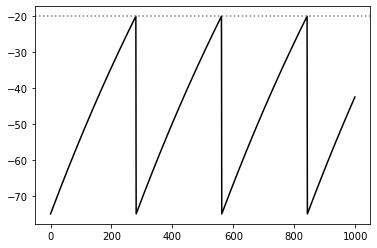

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.934ms


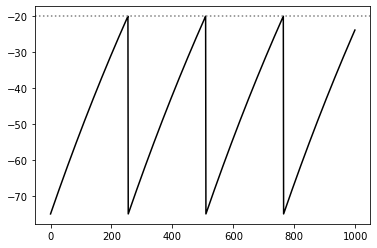

In [41]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-70, voltage_reset=-75, threshold=-20, tau=100),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

ولتاژ پایه (رست) را کمتر کردم. این عدد همچنان از ریست ولتاژ بیشتر است پس روی برد نمودار تاثیر ندارد. تاثیر بصری دیگری هم روی نمودارها ایجاد نمی‌کند. 

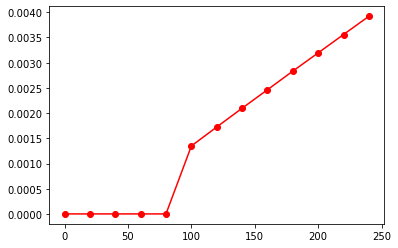

In [42]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [43]:
# voltage_rest=-55, voltage_reset=-75, threshold=-50, tau=100

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 36.928ms


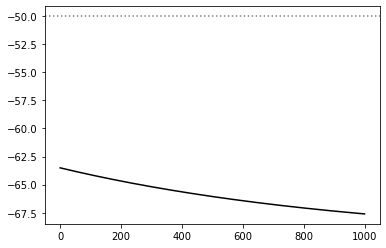

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.242ms


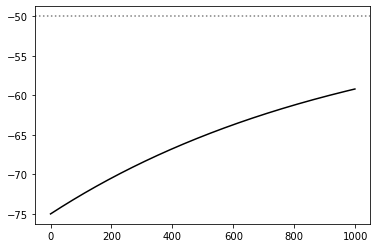

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.232ms


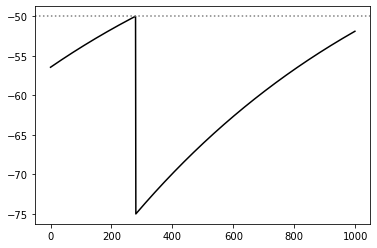

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.243ms


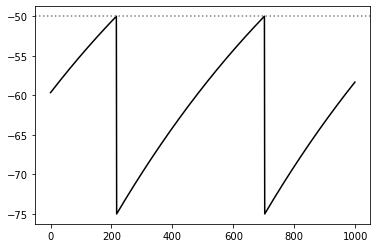

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.253ms


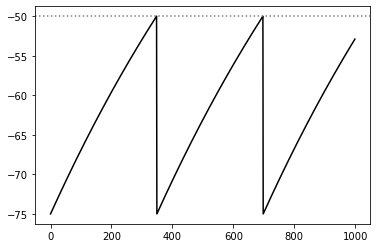

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.253ms


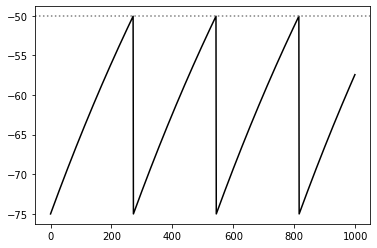

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.244ms


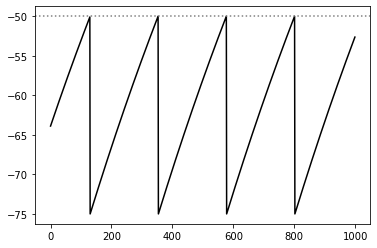

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.256ms


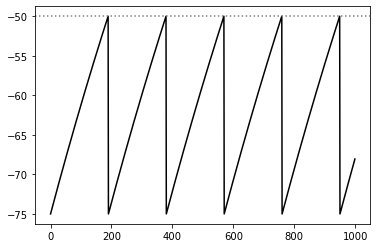

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.254ms


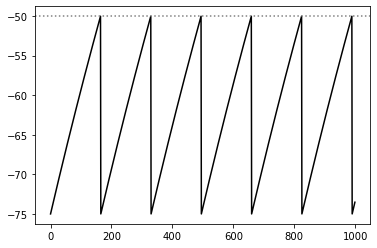

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.243ms


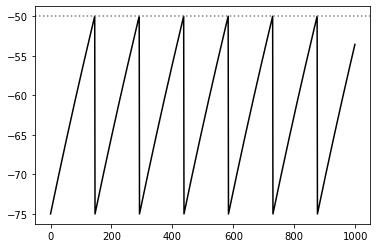

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.253ms


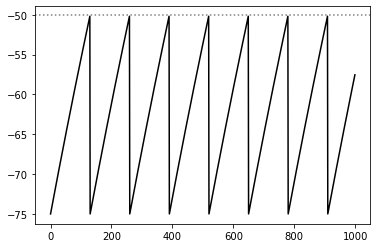

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.245ms


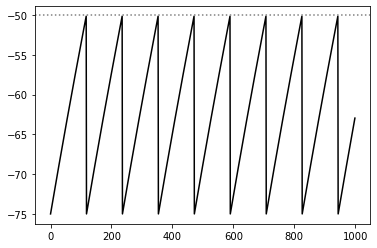

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.247ms


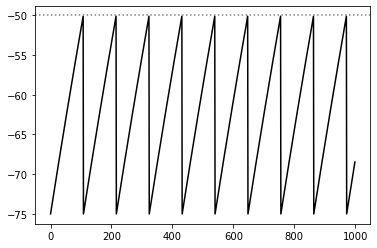

In [44]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-70, voltage_reset=-75, threshold=-50, tau=100),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network

F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

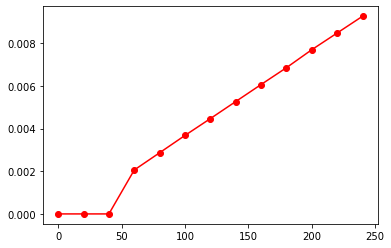

In [45]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [46]:
## voltage_rest=-55, voltage_reset=-75, threshold=-50, tau=10

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 31.243ms


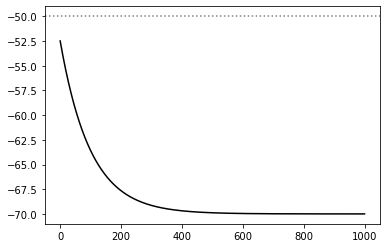

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 43.760ms


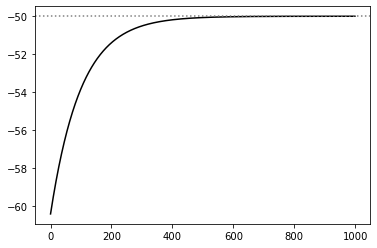

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 46.865ms


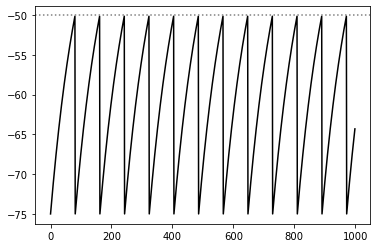

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 22.801ms


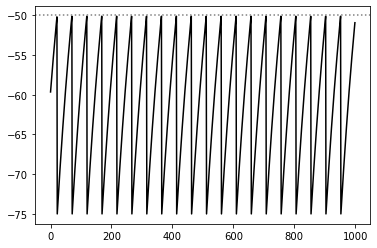

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 30.693ms


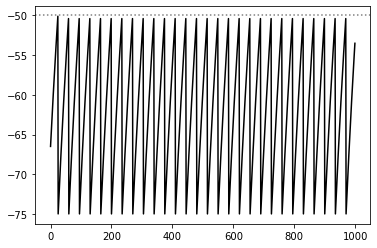

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 34.626ms


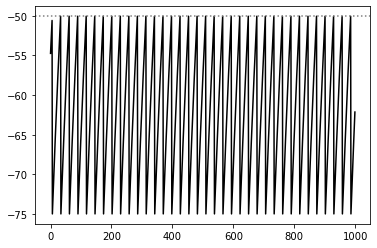

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 37.834ms


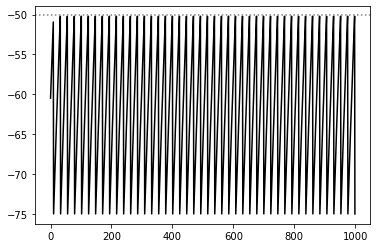

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 21.079ms


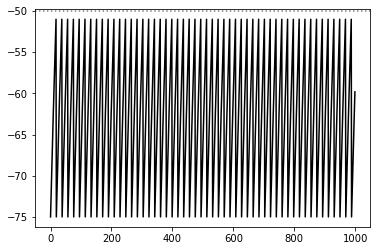

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 32.880ms


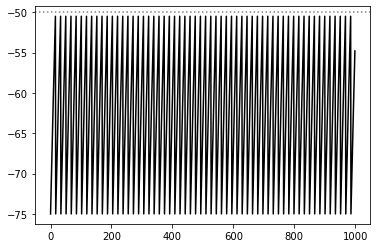

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 42.195ms


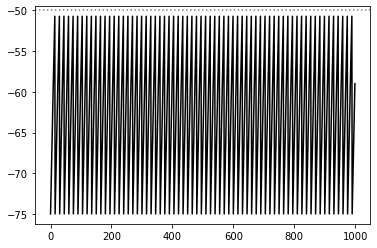

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 29.882ms


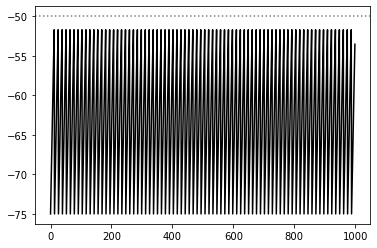

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 33.857ms


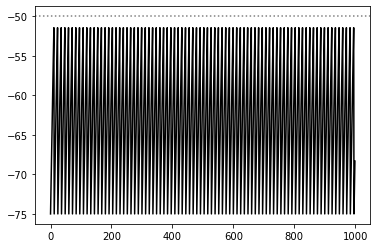

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
1000xBatch: 1/1 (100%) 38.934ms


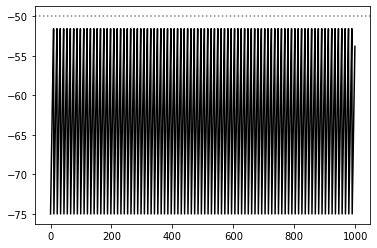

In [47]:
def present_LIF_neuron_activity():
    single_neuron_network = Network()

    neuron = NeuronGroup(net=single_neuron_network, tag='LIF_neuron', size=1, behaviour={
        1: LIF(voltage_rest=-70, voltage_reset=-75, threshold=-50, tau=10),
        2: LIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})
    
    single_neuron_network.initialize()
    single_neuron_network.simulate_iterations(ITERATIONS, measure_block_time=True)
    
    plot_ut(single_neuron_network['n.voltage', 0],single_neuron_network['LIF', 0].threshold)
    return single_neuron_network

F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_LIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

مقدار استانه را کاهش دادم. تغیرات اصلی مربوط به شدت جریانی است که باعث فایر شدن می‌شود. نمودارها از عدد جریان کوچکتری شروع به ضربه می‌کنند. اگر روی نمودار جریان-فرکانس هم نگاه کنیم افزایش فرکانس زودتر شروع می‌شود.

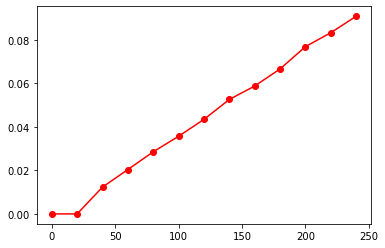

In [48]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

# ELIF

In [49]:
## voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=1, tetha_rh=-30
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100, delta=1, tetha_rh=-30
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-30
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-20
# voltage_rest=-55, voltage_reset=-90, threshold=-20, tau=10, delta=10, tetha_rh=-20

In [50]:
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100, delta=1, tetha_rh=-30

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.694ms


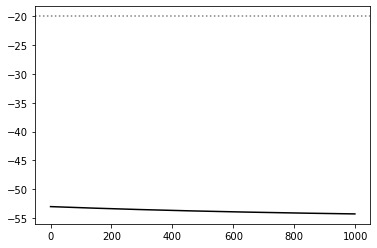

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 33.923ms


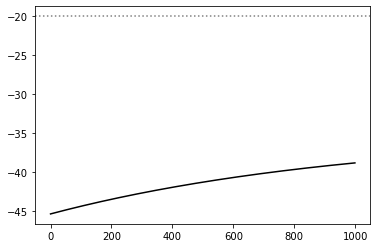

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 38.921ms


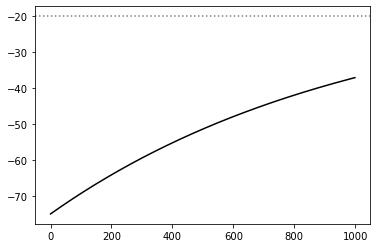

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 44.129ms


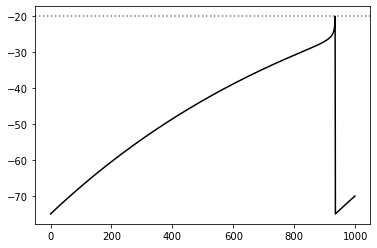

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.286ms


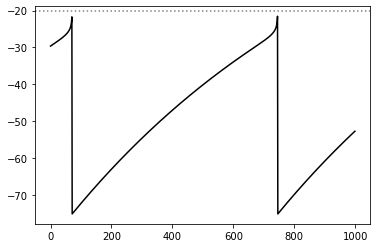

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 31.244ms


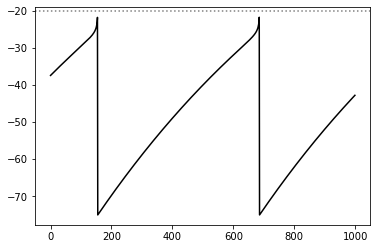

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.792ms


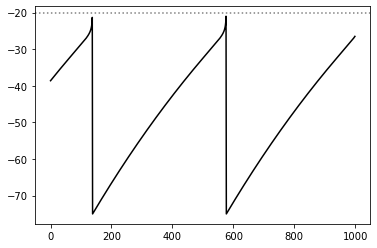

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 40.859ms


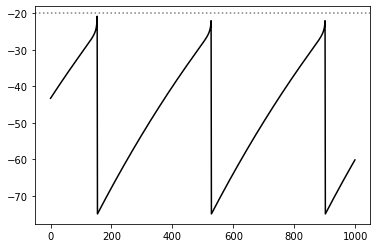

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 26.851ms


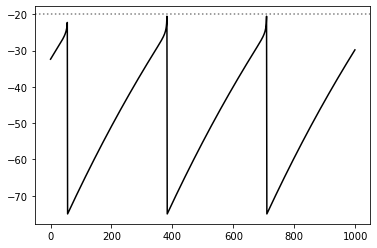

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 51.941ms


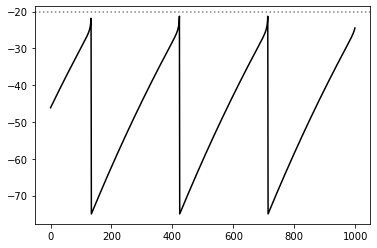

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.851ms


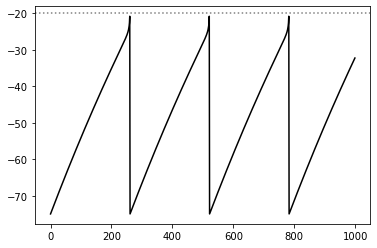

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 41.888ms


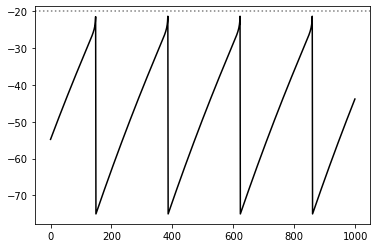

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 31.218ms


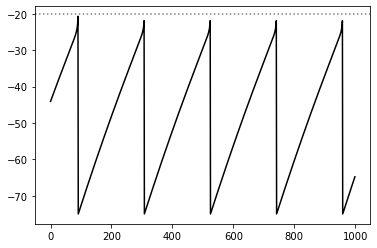

In [51]:
def present_ELIF_neuron_activity():
    single_neuron_network2 = Network()

    neuron2 = NeuronGroup(net=single_neuron_network2, tag='ELIF_neuron', size=1, behaviour={
        1: ELIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=100, delta=1, tetha_rh=-30),
        2: ELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network2.initialize()
    single_neuron_network2.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network2['n.voltage', 0],single_neuron_network2['ELIF', 0].threshold)
    return single_neuron_network2


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_ELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

متغیر تاو را 10 برابر کردم. تاثیر همان است که در مدل قبلی بود.  تغیرات اختلاف پتانسیل بر اثر جریان های وارده با شیب ملایم تری اتفاق میوفتند.

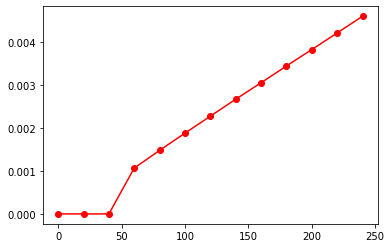

In [52]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [53]:
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-30

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 44.850ms


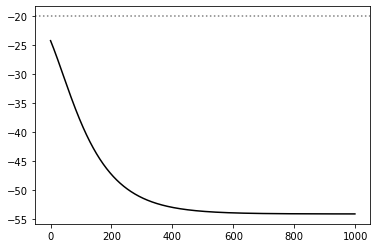

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 33.208ms


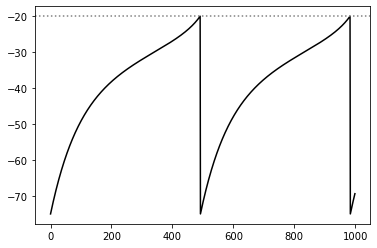

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 38.907ms


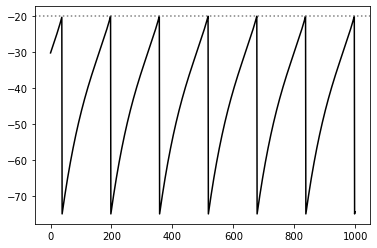

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 26.570ms


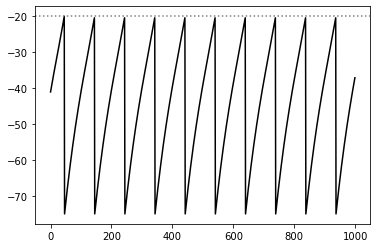

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 39.894ms


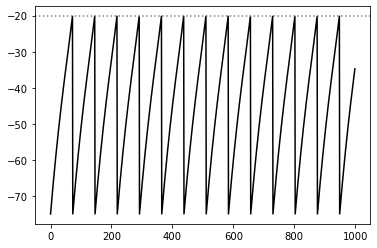

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 34.124ms


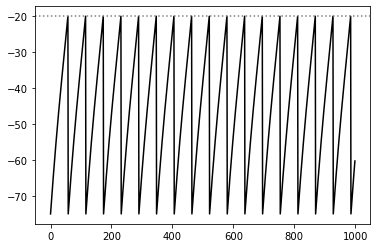

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 50.671ms


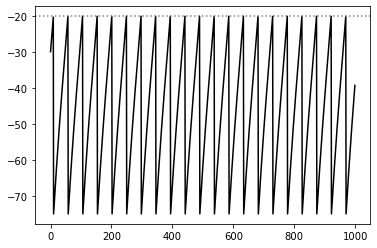

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 31.048ms


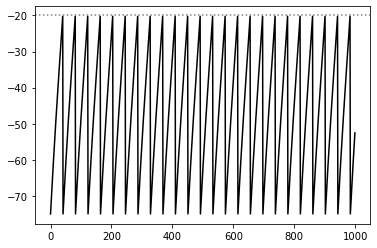

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 48.868ms


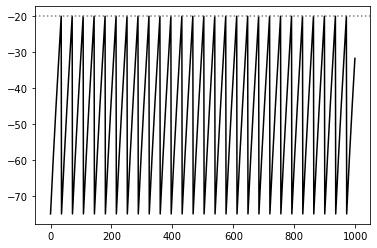

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 29.984ms


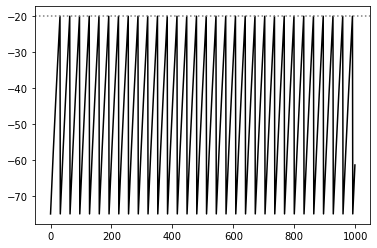

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 37.897ms


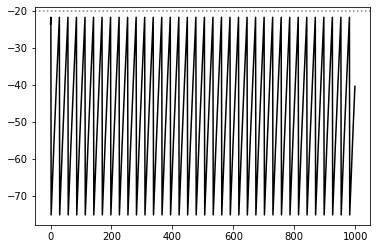

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 39.569ms


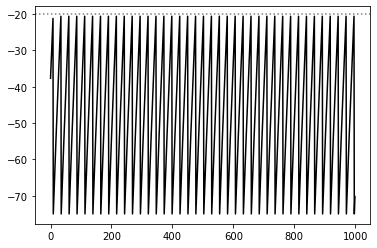

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.405ms


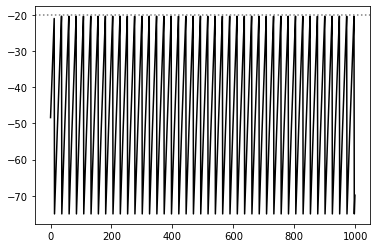

In [54]:
def present_ELIF_neuron_activity():
    single_neuron_network2 = Network()

    neuron2 = NeuronGroup(net=single_neuron_network2, tag='ELIF_neuron', size=1, behaviour={
        1: ELIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-30),
        2: ELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network2.initialize()
    single_neuron_network2.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network2['n.voltage', 0],single_neuron_network2['ELIF', 0].threshold)
    return single_neuron_network2


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_ELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

دلتای بیشتر سرعت تغیرات اختلاف پتانسیل را زیادتر می‌کند. روی متحنی ها به ازای جریان های مشابه بخش قبلی هم فرکانس ضربه ی بیشتر داریم و هم اینکه شیب رسیدن به استانه بندتر است.

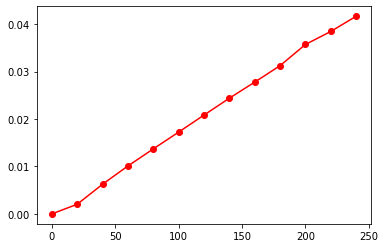

In [55]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [56]:
# voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-20

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 35.936ms


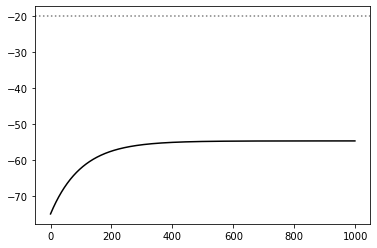

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 44.873ms


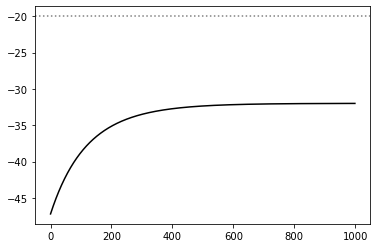

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 48.852ms


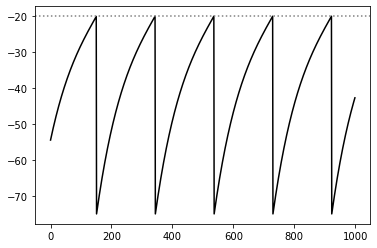

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 39.922ms


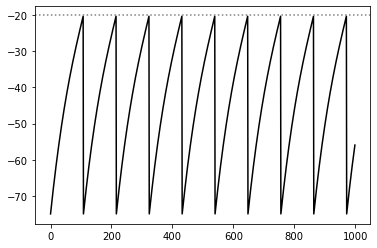

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 43.890ms


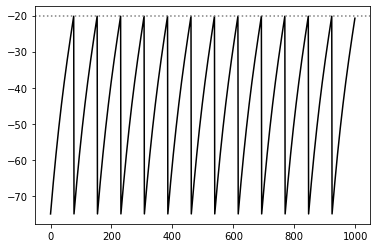

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 23.977ms


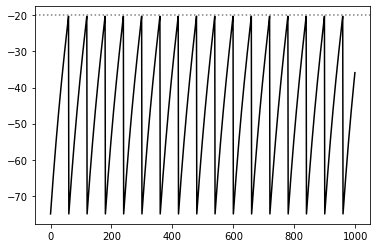

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 41.864ms


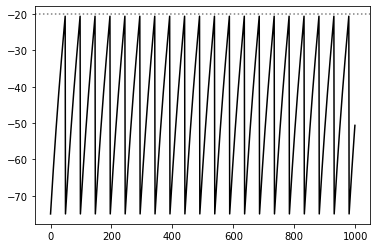

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.093ms


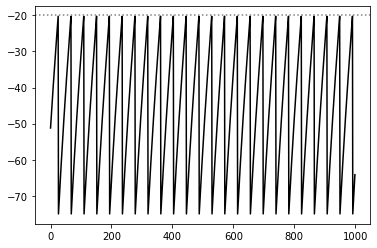

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.884ms


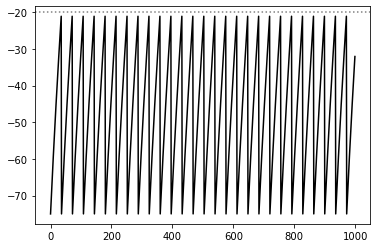

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.904ms


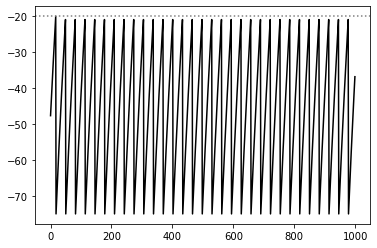

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 49.271ms


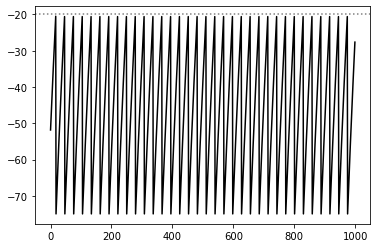

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 32.635ms


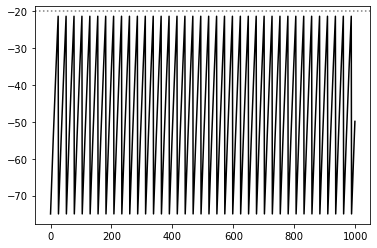

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 34.906ms


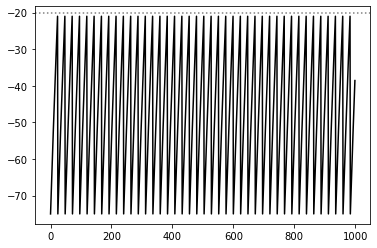

In [57]:
def present_ELIF_neuron_activity():
    single_neuron_network2 = Network()

    neuron2 = NeuronGroup(net=single_neuron_network2, tag='ELIF_neuron', size=1, behaviour={
        1: ELIF(voltage_rest=-55, voltage_reset=-75, threshold=-20, tau=10, delta=10, tetha_rh=-20),
        2: ELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network2.initialize()
    single_neuron_network2.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network2['n.voltage', 0],single_neuron_network2['ELIF', 0].threshold)
    return single_neuron_network2


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_ELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

تتا ار اچ را که حد اعمال تفیرات نمودار غیرخطی بر اختلاف پتانسیل است به استانه نزدیک کردم یعنی افزایش دادم. تفیرات کلی ای قابل مشاهده نسیت.

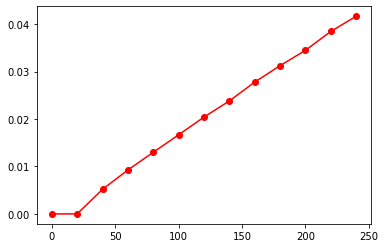

In [58]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [59]:
# voltage_rest=-55, voltage_reset=-90, threshold=-20, tau=10, delta=10, tetha_rh=-20

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 41.922ms


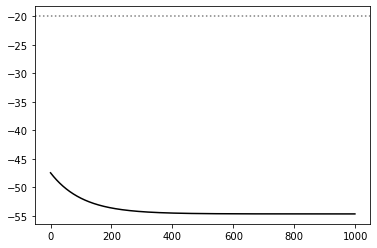

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 42.912ms


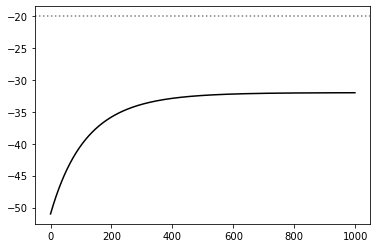

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 39.882ms


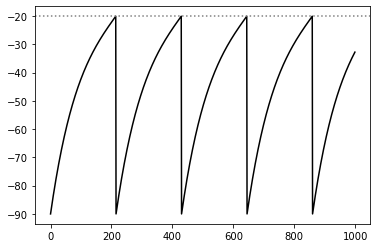

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 38.890ms


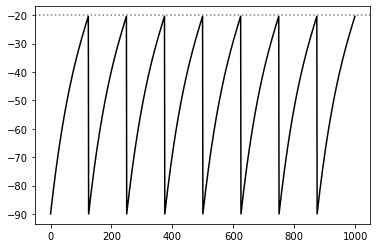

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 51.878ms


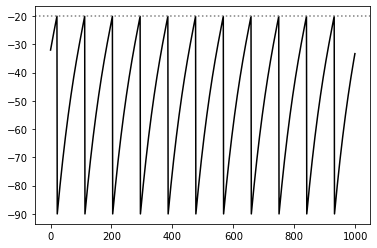

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 31.894ms


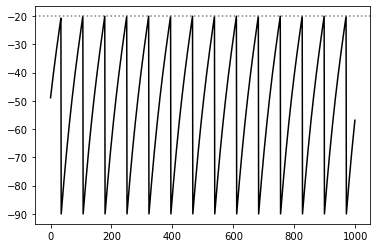

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 44.880ms


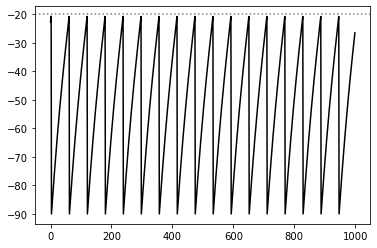

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 19.697ms


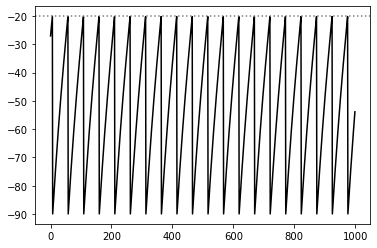

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 43.347ms


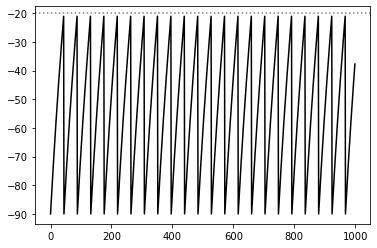

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 23.101ms


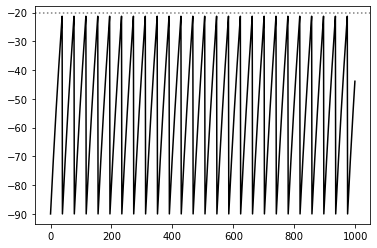

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 52.839ms


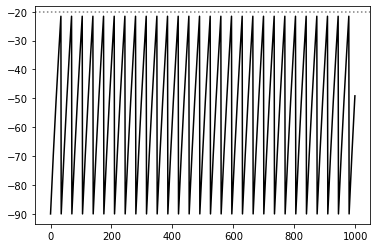

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 43.881ms


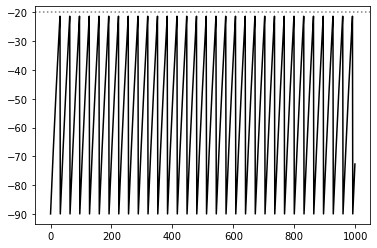

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
1000xBatch: 1/1 (100%) 45.883ms


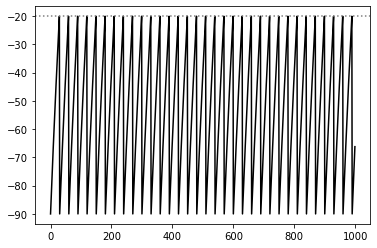

In [60]:
def present_ELIF_neuron_activity():
    single_neuron_network2 = Network()

    neuron2 = NeuronGroup(net=single_neuron_network2, tag='ELIF_neuron', size=1, behaviour={
        1: ELIF(voltage_rest=-55, voltage_reset=-90, threshold=-20, tau=10, delta=10, tetha_rh=-20),
        2: ELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network2.initialize()
    single_neuron_network2.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network2['n.voltage', 0],single_neuron_network2['ELIF', 0].threshold)
    return single_neuron_network2


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_ELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

تغیرات ولتاژ ریست (کاهش) هم تاثیرش مانند تاثیر بر بخش قبلی هست.

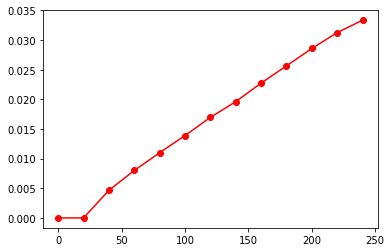

In [61]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

# AELIF

In [62]:
##voltage_rest=-55, voltage_reset=-75,
##             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=1, b=1, w=0
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=10, tetha_rh=-30, tau_w=5, a=1, b=1, w=0
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=10, a=1, b=1, w=0
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=10, b=1, w=0
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=1, b=10, w=0

In [63]:
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=10, tetha_rh=-30, tau_w=5, a=1, b=1, w=0

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 50.879ms


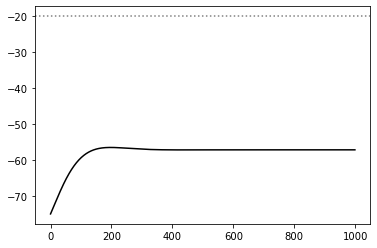

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 39.612ms


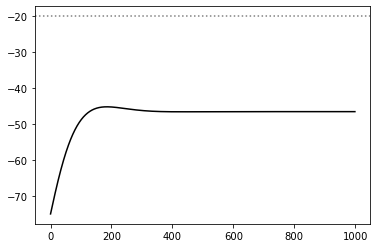

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 65.821ms


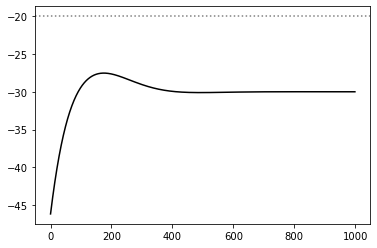

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 52.097ms


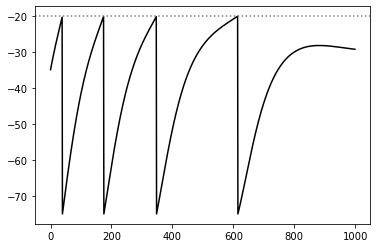

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 47.875ms


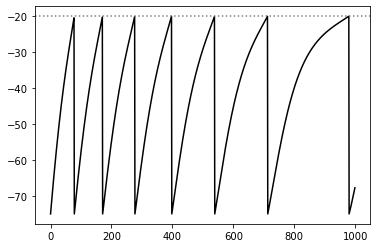

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 38.304ms


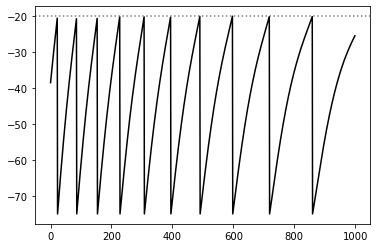

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 57.361ms


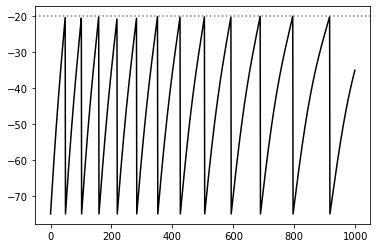

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 36.559ms


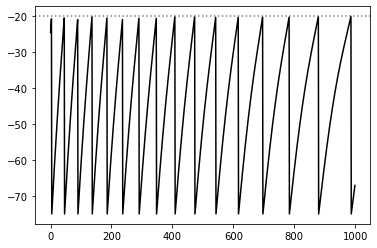

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 69.795ms


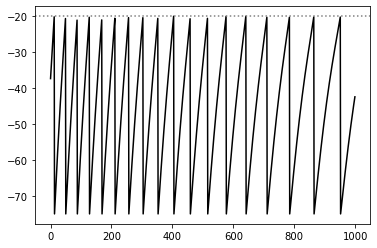

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 47.871ms


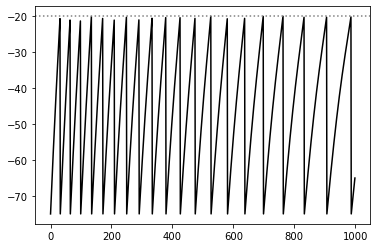

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 54.539ms


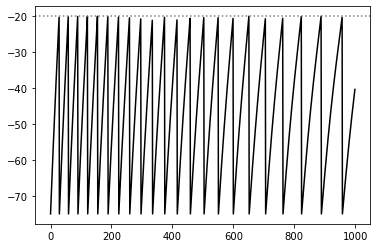

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 53.487ms


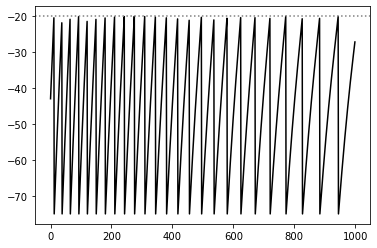

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 53.804ms


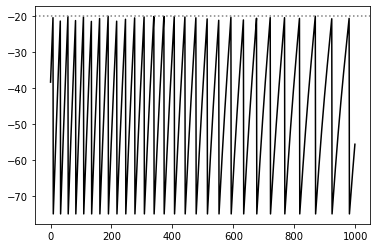

In [64]:
def present_AELIF_neuron_activity():
    single_neuron_network3 = Network()

    neuron3 = NeuronGroup(net=single_neuron_network3, tag='AELIF_neuron', size=1, behaviour={
        1: AELIF(voltage_rest=-55, voltage_reset=-75,
             threshold=-20, tau=10, delta=10, tetha_rh=-30, tau_w=5, a=1, b=1, w=0),
        2: AELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network3.initialize()
    single_neuron_network3.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network3['n.voltage', 0],single_neuron_network3['AELIF', 0].threshold)
    return single_neuron_network3


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_AELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

تاثیر افزایش دلتا مانند بخش قبلی هست. سرعت(شیب) اقزایش اختلاف پتانسیل را زیاد می‌کند. 

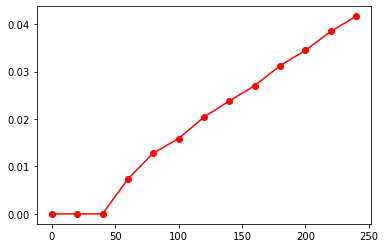

In [65]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [66]:
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=10, a=1, b=1, w=0

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 45.995ms


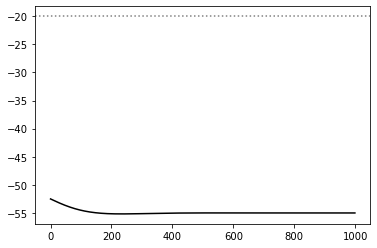

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 56.845ms


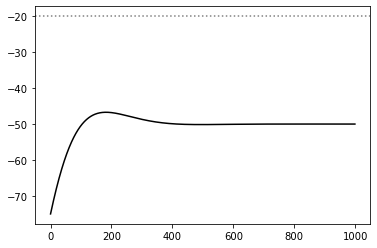

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 51.860ms


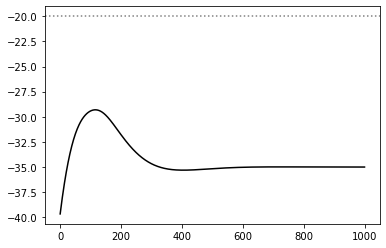

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.861ms


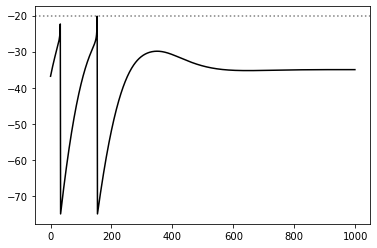

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.840ms


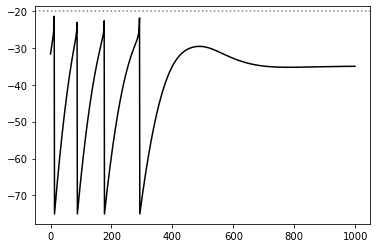

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.899ms


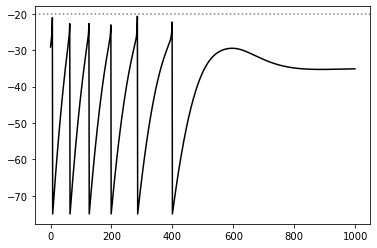

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 37.033ms


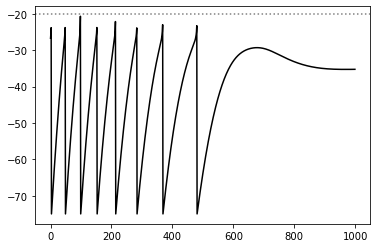

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 58.840ms


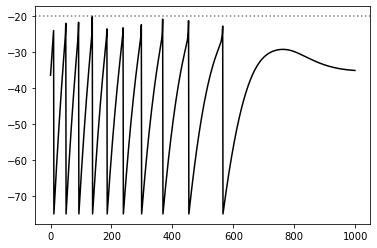

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 52.855ms


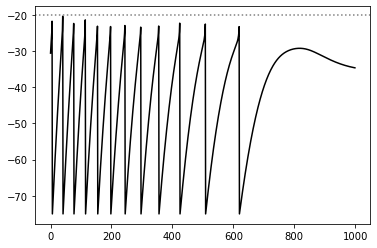

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 37.517ms


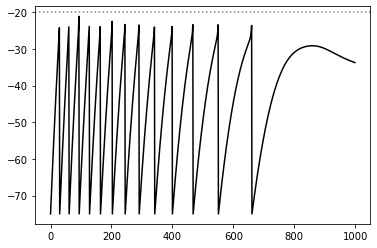

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 58.843ms


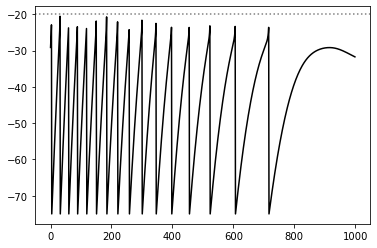

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 48.901ms


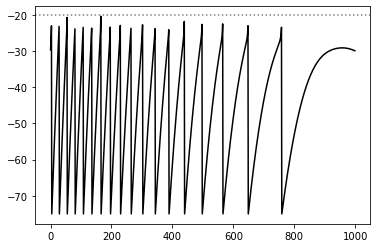

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 66.981ms


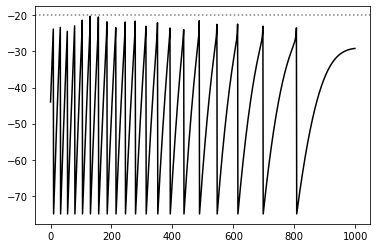

In [67]:
def present_AELIF_neuron_activity():
    single_neuron_network3 = Network()

    neuron3 = NeuronGroup(net=single_neuron_network3, tag='AELIF_neuron', size=1, behaviour={
        1: AELIF(voltage_rest=-55, voltage_reset=-75,
             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=10, a=1, b=1, w=0),
        2: AELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network3.initialize()
    single_neuron_network3.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network3['n.voltage', 0],single_neuron_network3['AELIF', 0].threshold)
    return single_neuron_network3


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_AELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

افزایش تاو دبلیو قابلیت انطباق مدل را بیشتر می‌کند. حساسیت به جریان ثابت ورودی را بعد از گذشت زمان کم می‌کند.

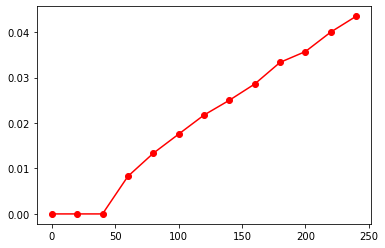

In [68]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [69]:
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=10, b=1, w=0

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 50.863ms


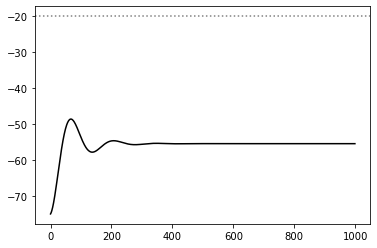

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 56.850ms


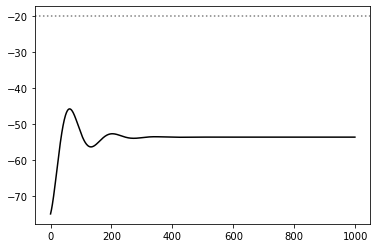

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 54.853ms


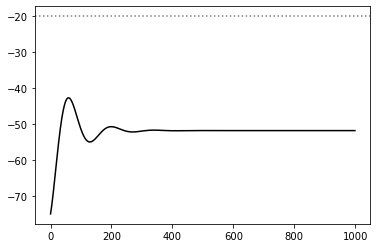

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 61.861ms


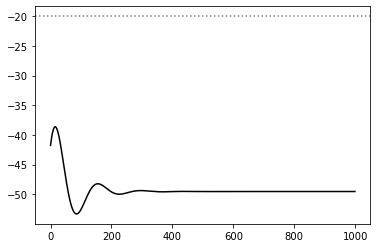

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.916ms


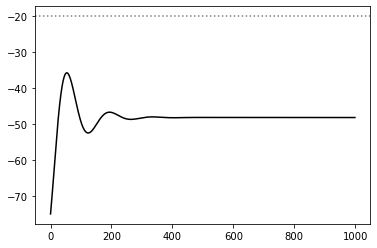

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.863ms


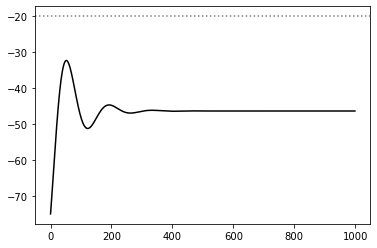

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 56.857ms


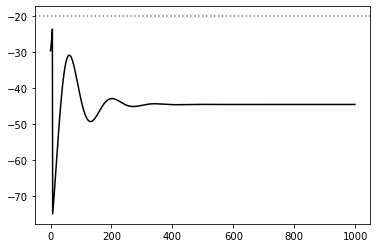

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.068ms


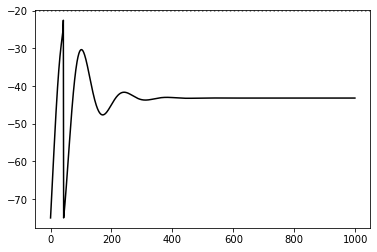

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 44.728ms


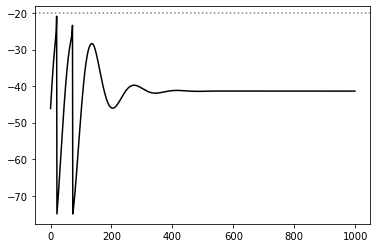

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 42.375ms


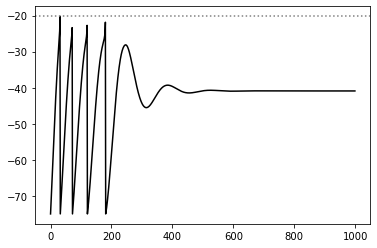

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.736ms


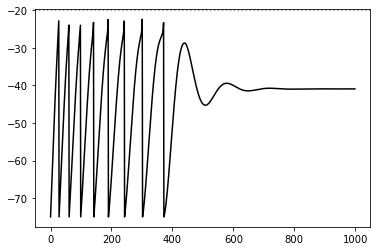

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 51.941ms


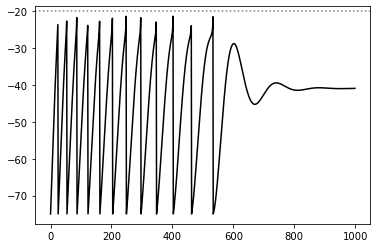

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 53.854ms


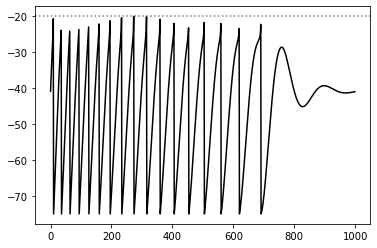

In [70]:
def present_AELIF_neuron_activity():
    single_neuron_network3 = Network()

    neuron3 = NeuronGroup(net=single_neuron_network3, tag='AELIF_neuron', size=1, behaviour={
        1: AELIF(voltage_rest=-55, voltage_reset=-75,
             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=10, b=1, w=0),
        2: AELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network3.initialize()
    single_neuron_network3.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network3['n.voltage', 0],single_neuron_network3['AELIF', 0].threshold)
    return single_neuron_network3


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_AELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

افزایش آ نسبت به حالت قبل اولا باعث انطباق مدل با جریان ورودی می‌شود. و تاثیر مشخص تری که دارد اینکه به انتهای نمودار یک دنباله ی رها و بدون تغیر اضافه می‌کند که نمی دانم دقیقا علت این پدیده چیست. 

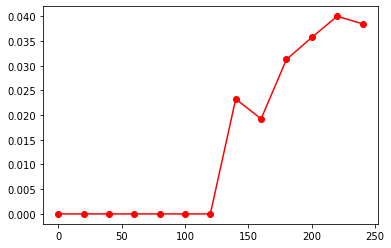

In [71]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()

In [72]:
#voltage_rest=-55, voltage_reset=-75,
#             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=1, b=10, w=0

input_current = 0
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.959ms


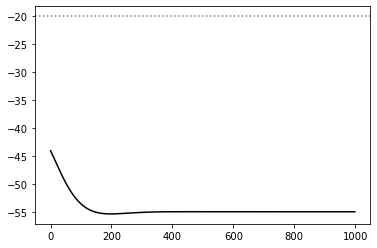

input_current = 20
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 49.867ms


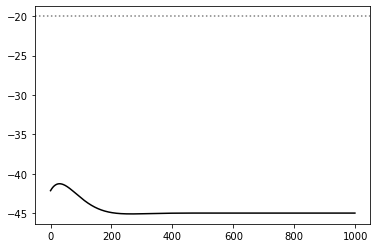

input_current = 40
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 54.820ms


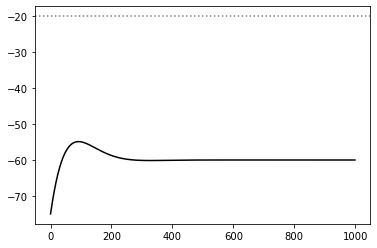

input_current = 60
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.841ms


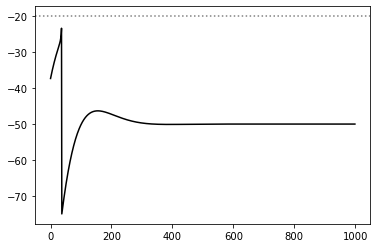

input_current = 80
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 46.841ms


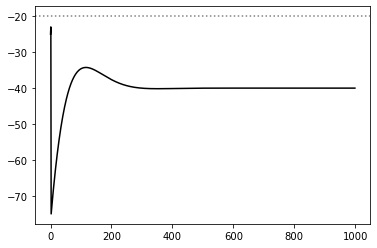

input_current = 100
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 55.853ms


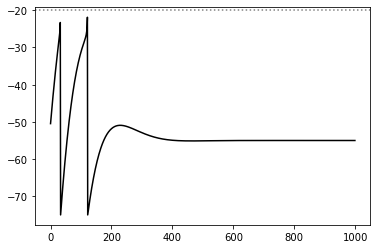

input_current = 120
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 51.864ms


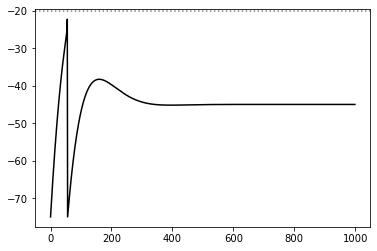

input_current = 140
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 50.895ms


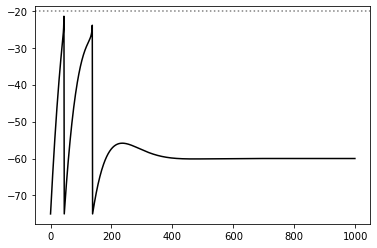

input_current = 160
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 53.857ms


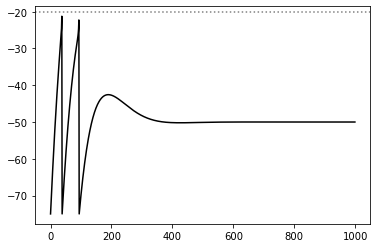

input_current = 180
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 51.860ms


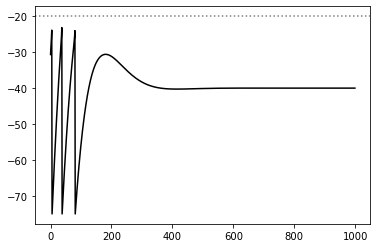

input_current = 200
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 58.810ms


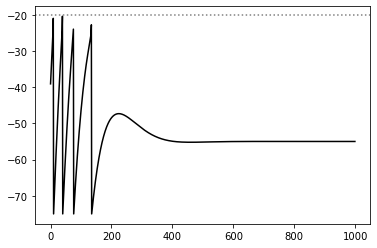

input_current = 220
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 54.853ms


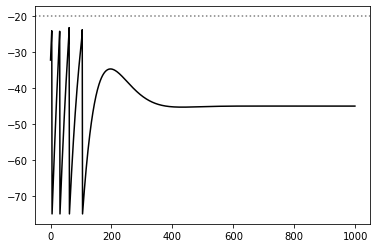

input_current = 240
init voltage_rest
init voltage_reset
init threshold
init tau
init delta
init tetha_rh
init tau_w
init a
init b
init w
1000xBatch: 1/1 (100%) 52.841ms


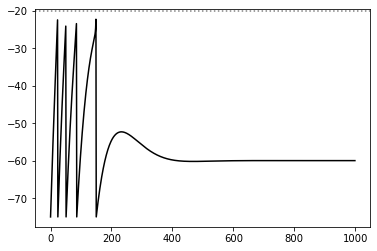

In [73]:
def present_AELIF_neuron_activity():
    single_neuron_network3 = Network()

    neuron3 = NeuronGroup(net=single_neuron_network3, tag='AELIF_neuron', size=1, behaviour={
        1: AELIF(voltage_rest=-55, voltage_reset=-75,
             threshold=-20, tau=10, delta=1, tetha_rh=-30, tau_w=5, a=1, b=10, w=0),
        2: AELIF_input(),
        9: Recorder(tag='recorder', variables=['n.voltage', 'n.fired'])})

    single_neuron_network3.initialize()
    single_neuron_network3.simulate_iterations(ITERATIONS, measure_block_time=True)

    plot_ut(single_neuron_network3['n.voltage', 0],single_neuron_network3['AELIF', 0].threshold)
    return single_neuron_network3


F = []
I = []
ITERATIONS = 1000

for i in range(0,250,20):
    
    def current(t=None):
        return constant(i)
    
    print('input_current = {}'.format(current()))
    net = present_AELIF_neuron_activity()
    
    I.append(i)
    F.append(measure_F(net))

با زیاد کردن متفیر ب، جریانی که باعث به استانه رسیدن و فایر شدن می‌شود را به مقدار زیادی افزایش می‌دهد. و آن دنباله ای که در بخش قبلی گفتم هم دوباره به نمودارها اضافه می‌شود.

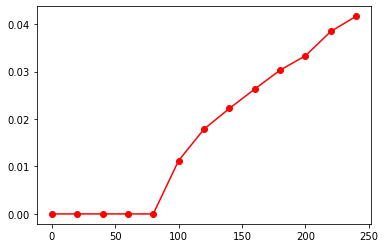

In [74]:
plt.scatter(I,F,color='red')
plt.plot(I,F,color='red')
plt.show()